In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

# Category files

In [2]:
countries = ['US','GB','CA','DE','FR']
category_dict = defaultdict(dict)
for country in countries:
    with open (f'{country}_category_id.json') as file:
        response = json.load(file)
        for item in response['items']:
            category_dict[country][item['id']] = item['snippet']['title']

# Data: US

In [3]:
us = pd.read_csv("USvideos.csv")
us.head()
us.dtypes
us['trending_date'] = pd.to_datetime(us['trending_date'], format = '%y.%d.%m')
us['trending_YearMonth'] = us['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
us['publish_time'] = pd.to_datetime(us['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
us_max_byMonth = us.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max() # category_id included as an index
us_view_max_byMonth = us_max_byMonth['views'].groupby(level=0, group_keys=False)
us_top20_byMonth = us_view_max_byMonth.nlargest(20)
us_top20_byMonth= us_top20_byMonth.reset_index()  # this is how to convert category_id from an index into a regular column
us_top20_byMonth['category_id'] = us_top20_byMonth['category_id'].astype(str)
us_top20_byMonth['category'] = us_top20_byMonth['category_id'].map(lambda x: category_dict['US'].get(x))
us_top20_byMonth['views'] = us_top20_byMonth['views']/1000000
us_top20_byMonth = us_top20_byMonth.rename(columns = {'views':'views(million)'})

# Data: GB

In [4]:
gb = pd.read_csv("GBvideos.csv")
gb.head()
gb.dtypes
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format = '%y.%d.%m')
gb['trending_YearMonth'] = gb['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
gb_max_byMonth = gb.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
gb_view_max_byMonth = gb_max_byMonth['views'].groupby(level=0, group_keys=False)
gb_top20_byMonth = gb_view_max_byMonth.nlargest(20)
gb_top20_byMonth= gb_top20_byMonth.reset_index()
gb_top20_byMonth['category_id'] = gb_top20_byMonth['category_id'].astype(str)
gb_top20_byMonth['category'] = gb_top20_byMonth['category_id'].map(lambda x: category_dict['GB'].get(x))
gb_top20_byMonth['views'] = gb_top20_byMonth['views']/1000000
gb_top20_byMonth = gb_top20_byMonth.rename(columns = {'views':'views(million)'})

# Data: CA

In [5]:
ca = pd.read_csv("CAvideos.csv")
ca.head()
ca.dtypes
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format = '%y.%d.%m')
ca['trending_YearMonth'] = ca['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
ca_max_byMonth = ca.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
ca_view_max_byMonth = ca_max_byMonth['views'].groupby(level=0, group_keys=False)
ca_top20_byMonth = ca_view_max_byMonth.nlargest(20)
ca_top20_byMonth= ca_top20_byMonth.reset_index()
ca_top20_byMonth['category_id'] = ca_top20_byMonth['category_id'].astype(str)
ca_top20_byMonth['category'] = ca_top20_byMonth['category_id'].map(lambda x: category_dict['CA'].get(x))
ca_top20_byMonth['views'] = ca_top20_byMonth['views']/1000000
ca_top20_byMonth = ca_top20_byMonth.rename(columns = {'views':'views(million)'})

# Data: DE

In [6]:
de = pd.read_csv("DEvideos.csv")
de.head()
de.dtypes
de['trending_date'] = pd.to_datetime(de['trending_date'], format = '%y.%d.%m')
de['trending_YearMonth'] = de['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
de['publish_time'] = pd.to_datetime(de['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
de_max_byMonth = de.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
de_view_max_byMonth = de_max_byMonth['views'].groupby(level=0, group_keys=False)
de_top20_byMonth = de_view_max_byMonth.nlargest(20)
de_top20_byMonth= de_top20_byMonth.reset_index()
de_top20_byMonth['category_id'] = de_top20_byMonth['category_id'].astype(str)
de_top20_byMonth['category'] = de_top20_byMonth['category_id'].map(lambda x: category_dict['DE'].get(x))
de_top20_byMonth['views'] = de_top20_byMonth['views']/1000000
de_top20_byMonth = de_top20_byMonth.rename(columns = {'views':'views(million)'})

# Data: FR

In [7]:
fr = pd.read_csv("FRvideos.csv")
fr.head()
fr.dtypes
fr['trending_date'] = pd.to_datetime(fr['trending_date'], format = '%y.%d.%m')
fr['trending_YearMonth'] = fr['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
fr['publish_time'] = pd.to_datetime(fr['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
fr_max_byMonth = fr.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
fr_view_max_byMonth = fr_max_byMonth['views'].groupby(level=0, group_keys=False)
fr_top20_byMonth = fr_view_max_byMonth.nlargest(20)
fr_top20_byMonth= fr_top20_byMonth.reset_index()
fr_top20_byMonth['category_id'] = fr_top20_byMonth['category_id'].astype(str)
fr_top20_byMonth['category'] = fr_top20_byMonth['category_id'].map(lambda x: category_dict['FR'].get(x))
fr_top20_byMonth['views'] = fr_top20_byMonth['views']/1000000
fr_top20_byMonth = fr_top20_byMonth.rename(columns = {'views':'views(million)'})

# Views bar charts

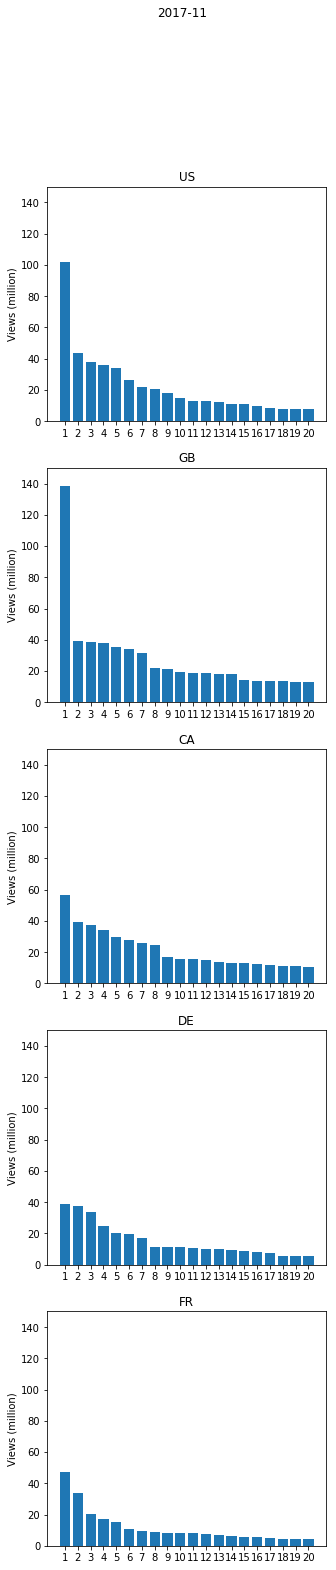

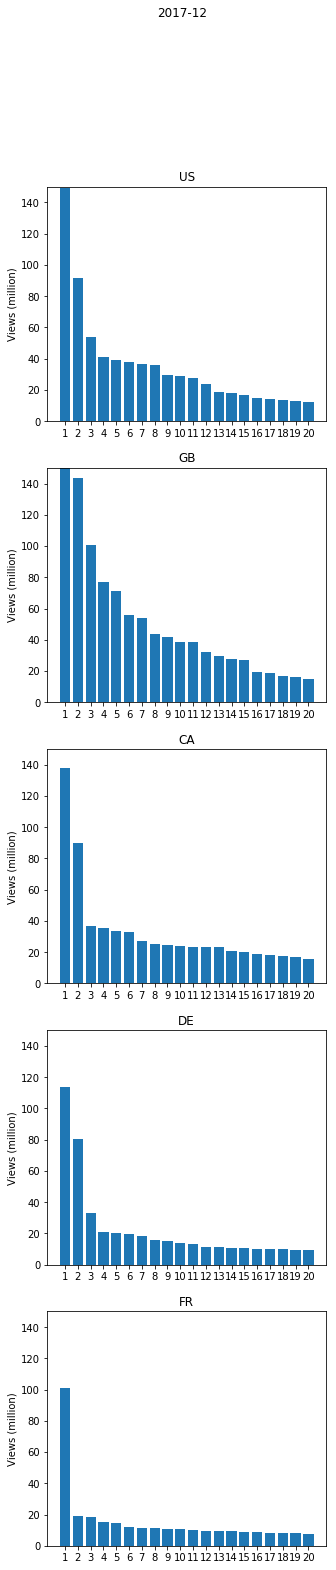

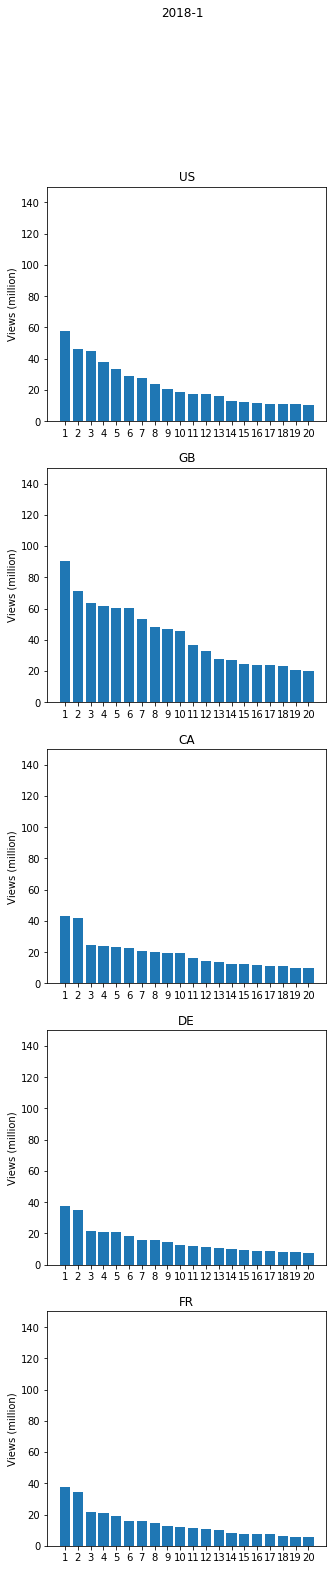

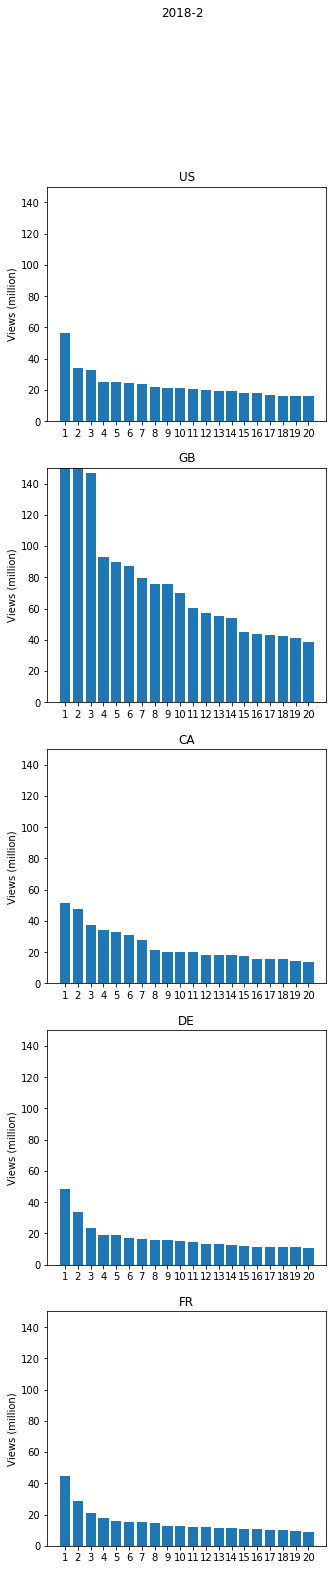

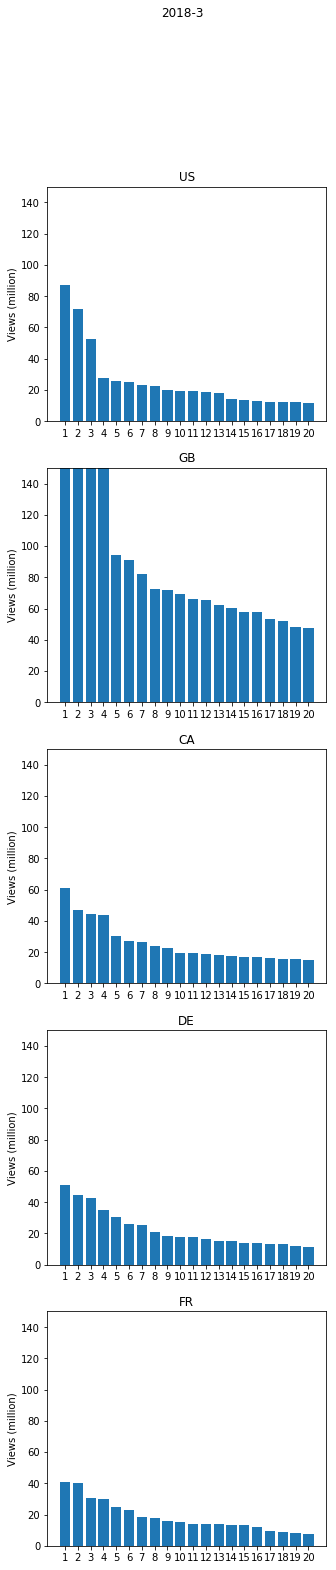

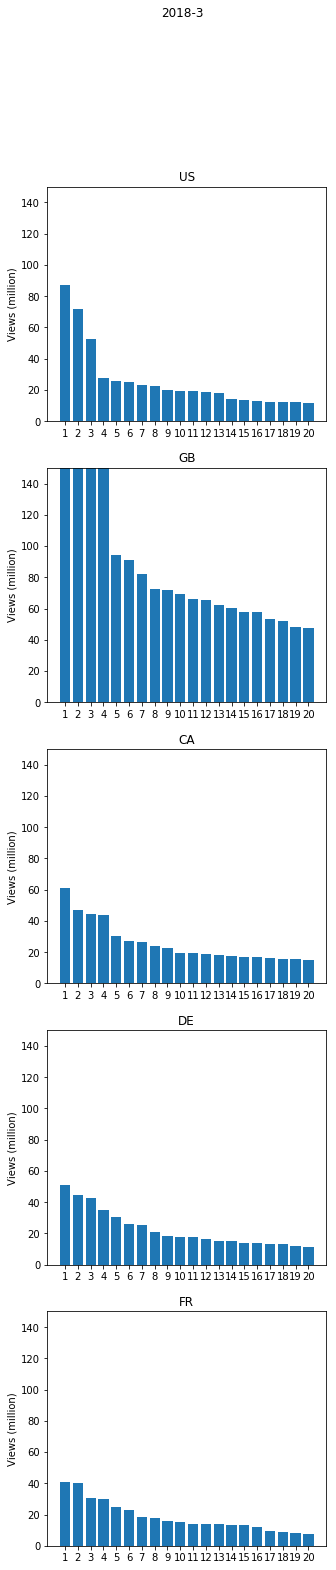

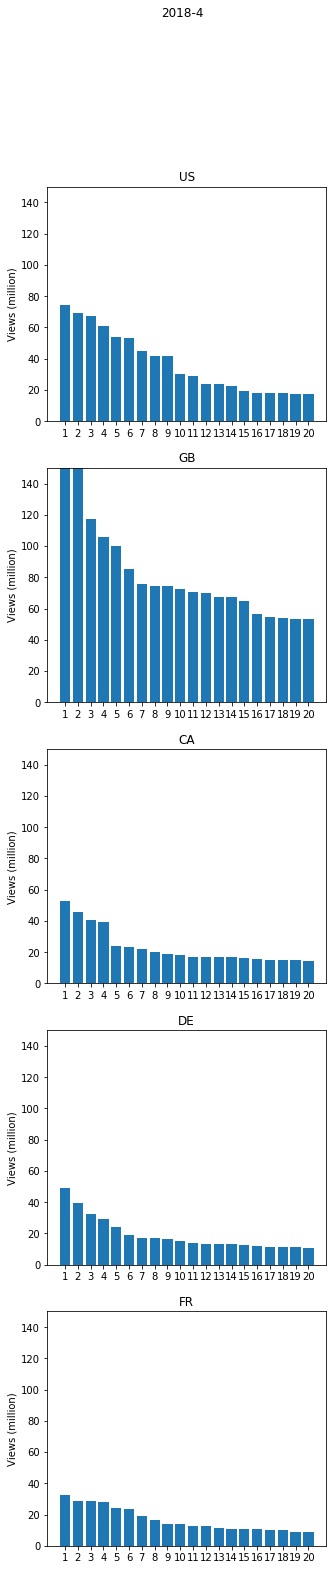

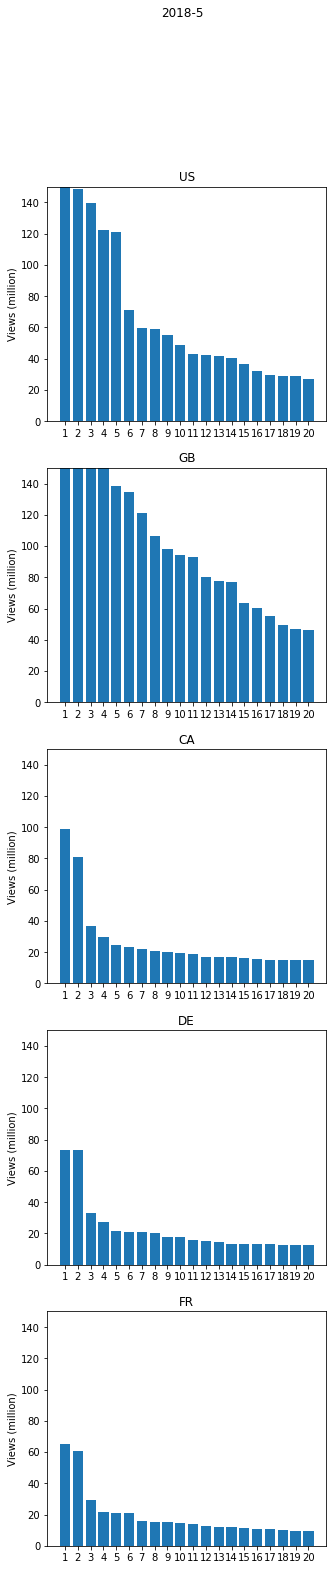

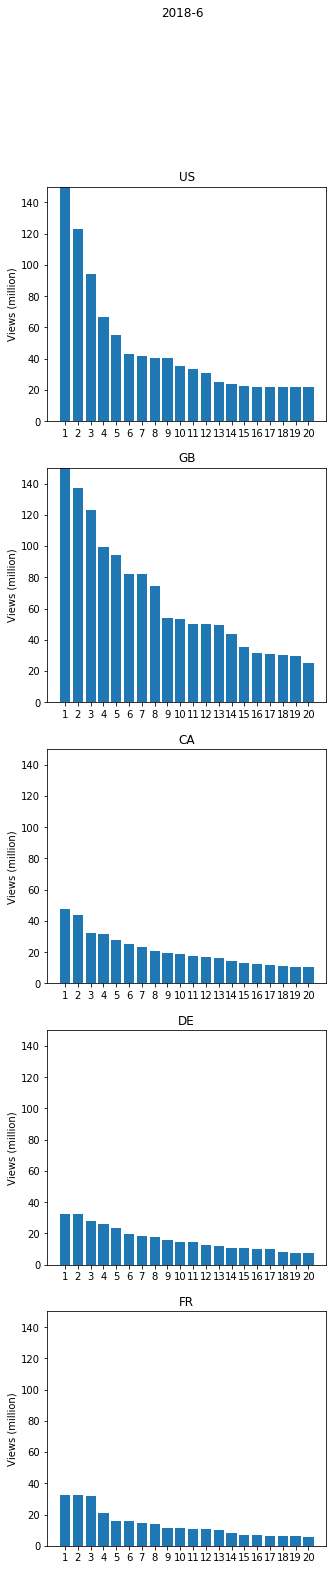

In [33]:
months = ['2017-11','2017-12','2018-1','2018-2','2018-3','2018-3','2018-4','2018-5','2018-6']
for month in months:
    us = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth']==month,['title','views(million)']]
    gb = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth']==month,['title','views(million)']]
    ca = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth']==month,['title','views(million)']]
    de = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth']==month,['title','views(million)']]
    fr = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth']==month,['title','views(million)']]
    plt.figure(figsize=(5,25))
    plt.suptitle(f'{month}')
    plt.subplot(5,1,1,)
    plt.bar(np.arange(20),us['views(million)'])
    plt.title('US')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,150)
    plt.ylabel('Views (million)')
    plt.subplot(5,1,2)
    plt.bar(np.arange(20),gb['views(million)'])
    plt.title('GB')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,150)
    plt.ylabel('Views (million)')
    plt.subplot(5,1,3)  
    plt.bar(np.arange(20),ca['views(million)'])
    plt.title('CA')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,150)
    plt.ylabel('Views (million)')
    plt.subplot(5,1,4)   
    plt.bar(np.arange(20),de['views(million)'])
    plt.title('DE')
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,150)
    plt.ylabel('Views (million)')
    plt.subplot(5,1,5)    
    plt.bar(np.arange(20),fr['views(million)'])
    plt.xticks(np.arange(20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.ylim(0,150)
    plt.title('FR')
    plt.ylabel('Views (million)')
    plt.savefig('Views_{month}.png')

# Category Overlap across countries

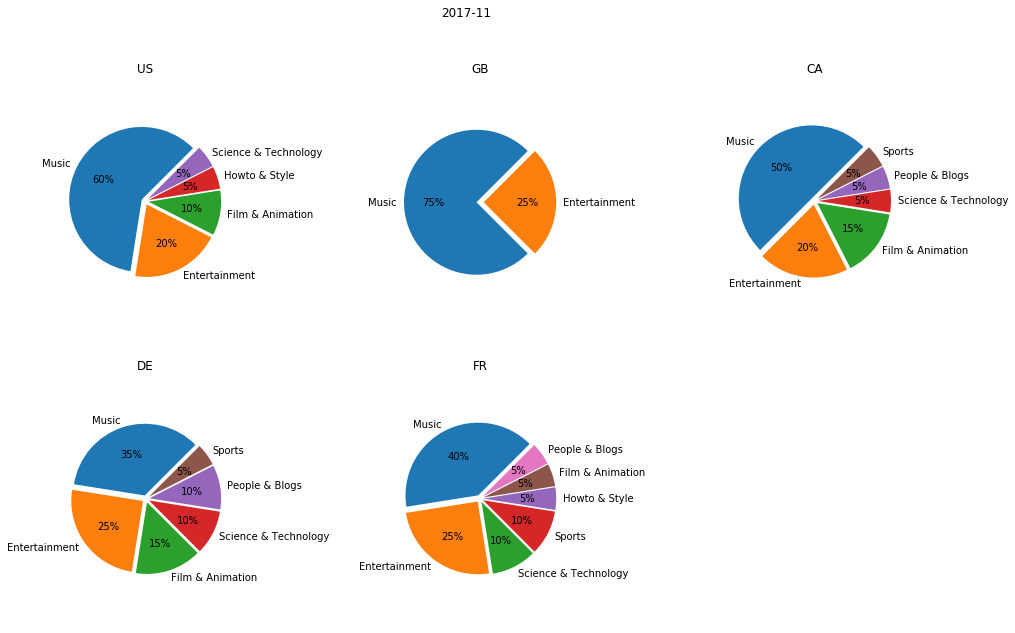

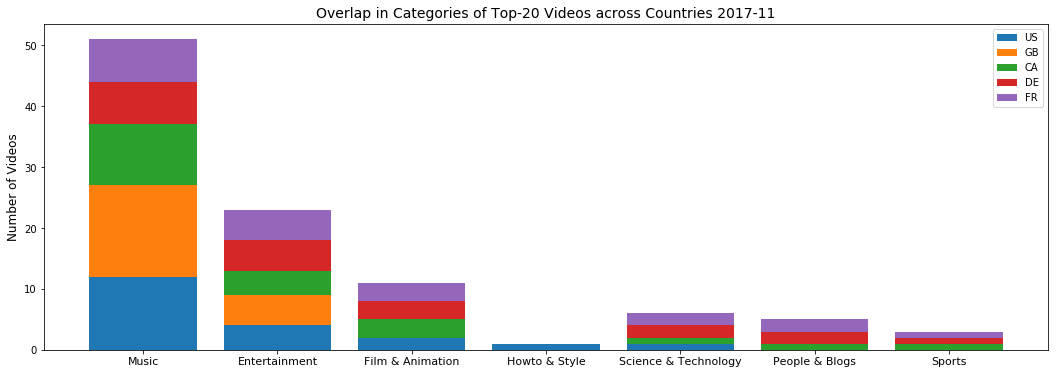

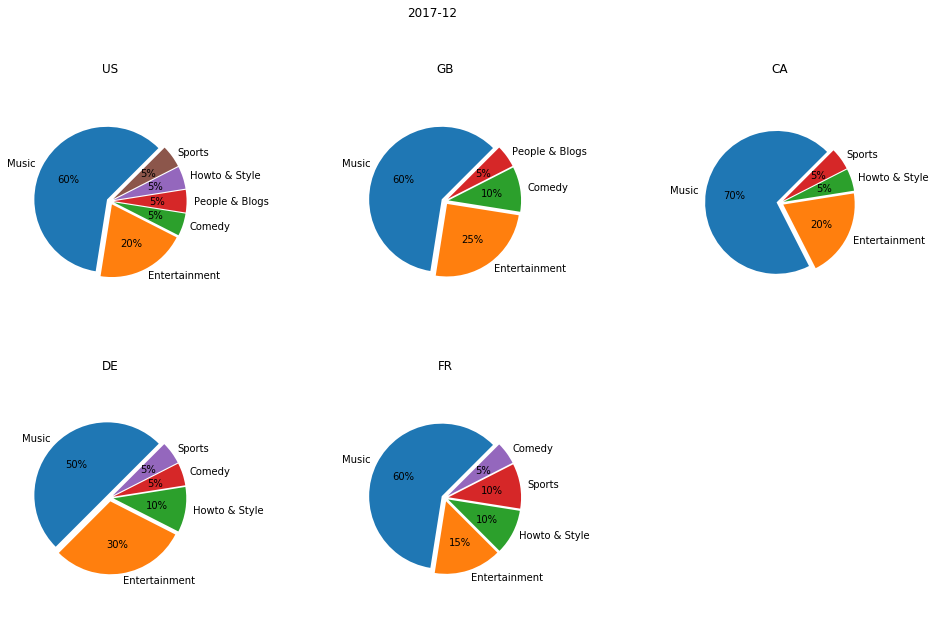

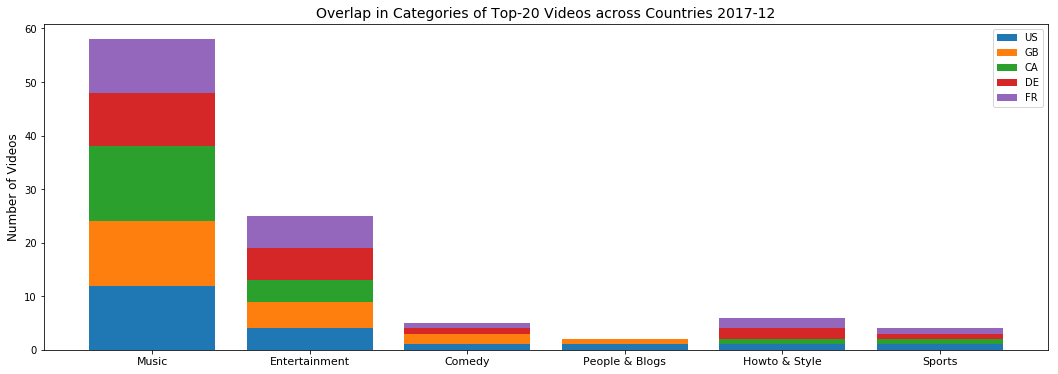

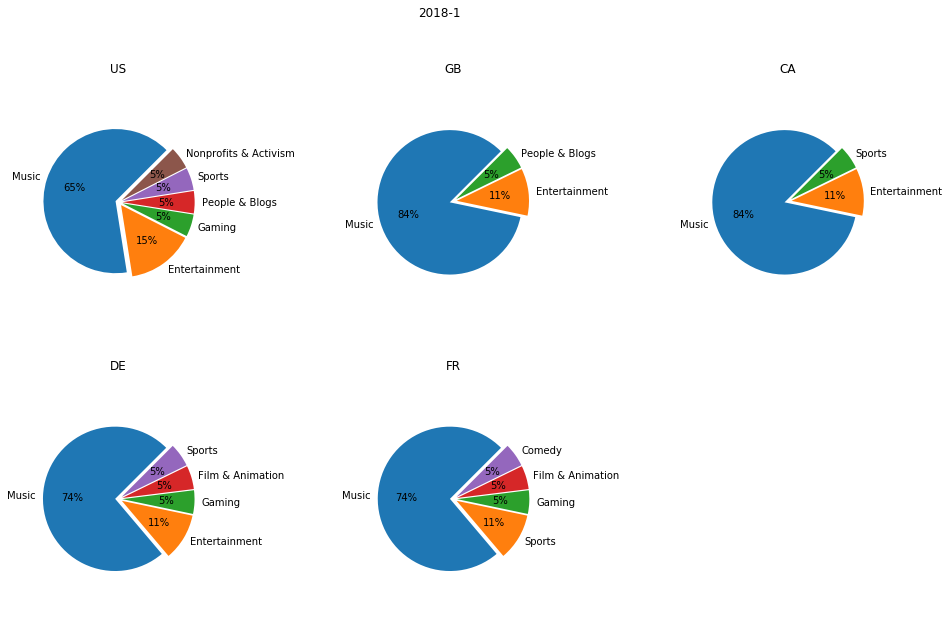

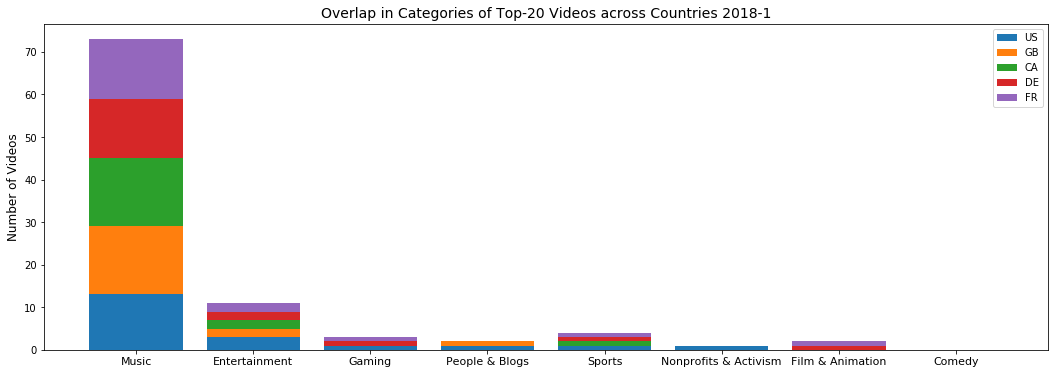

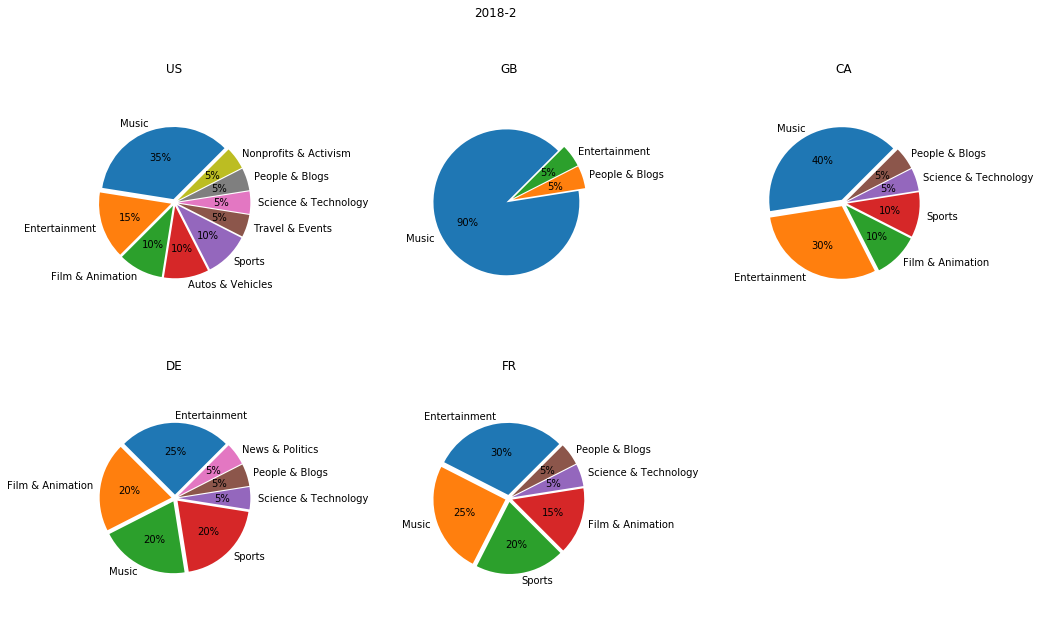

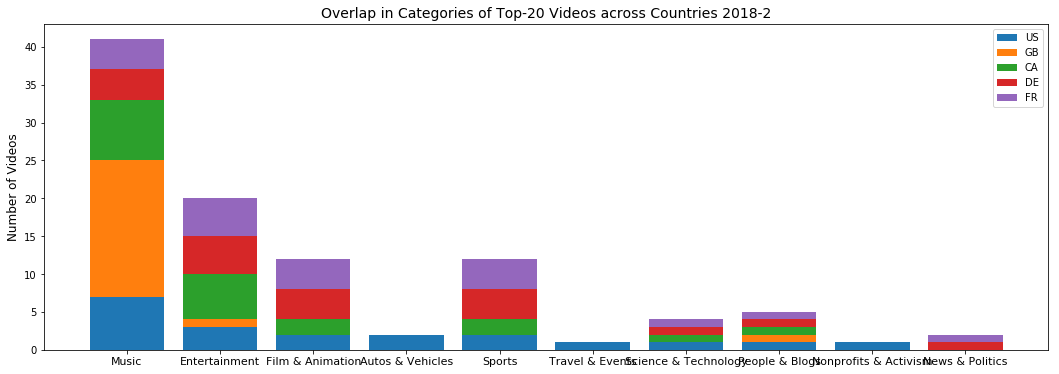

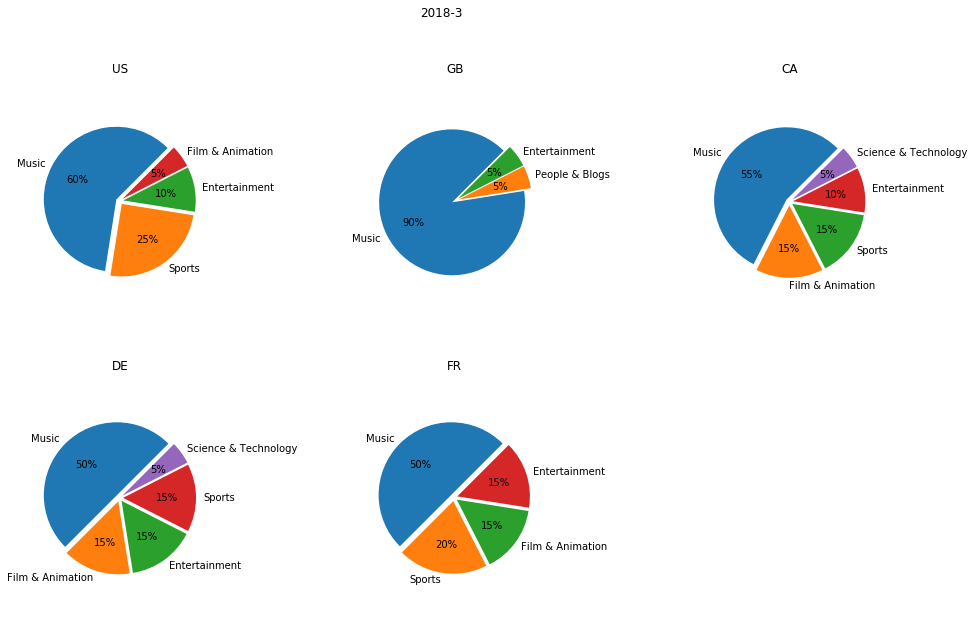

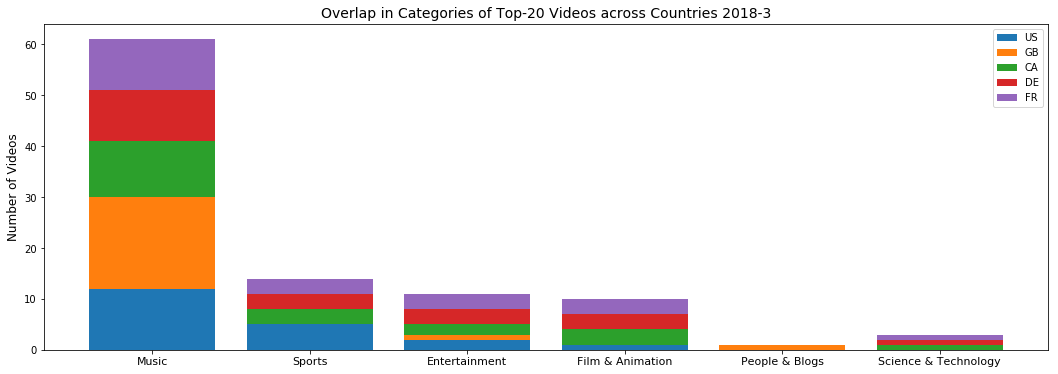

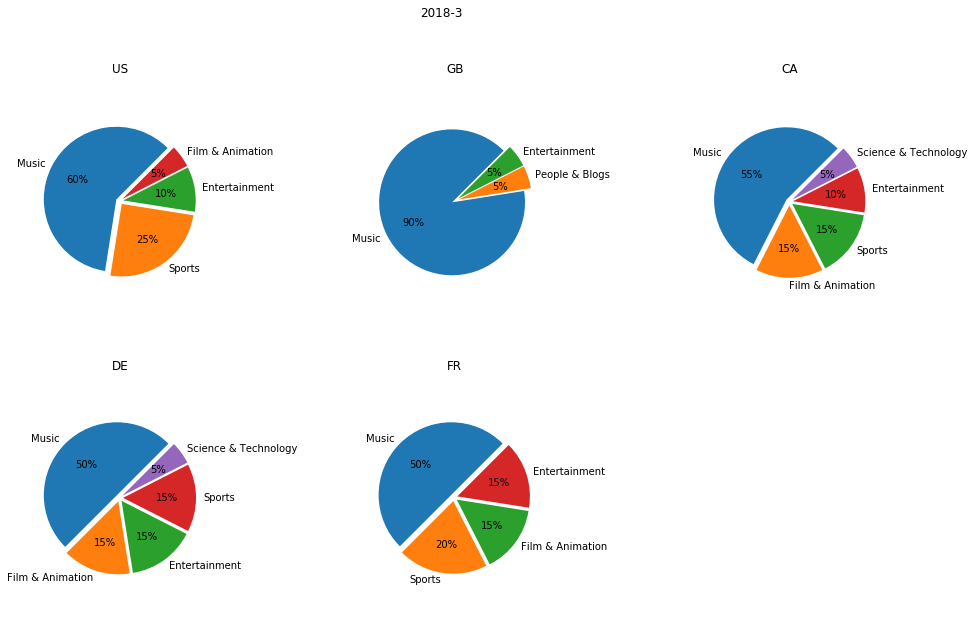

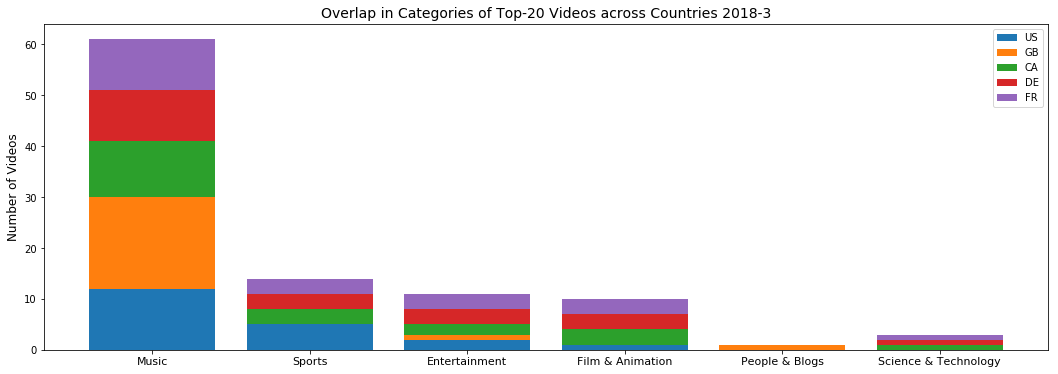

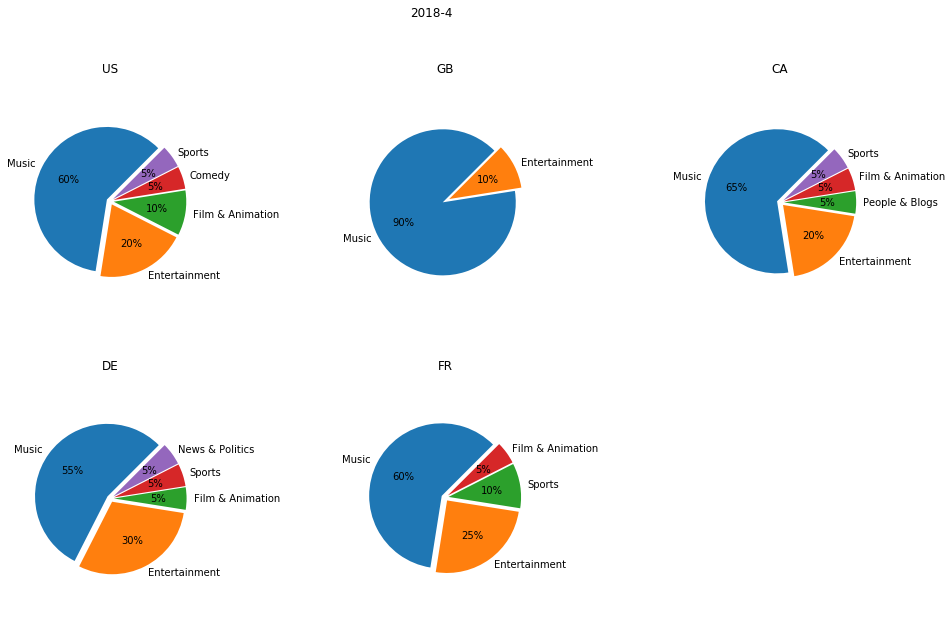

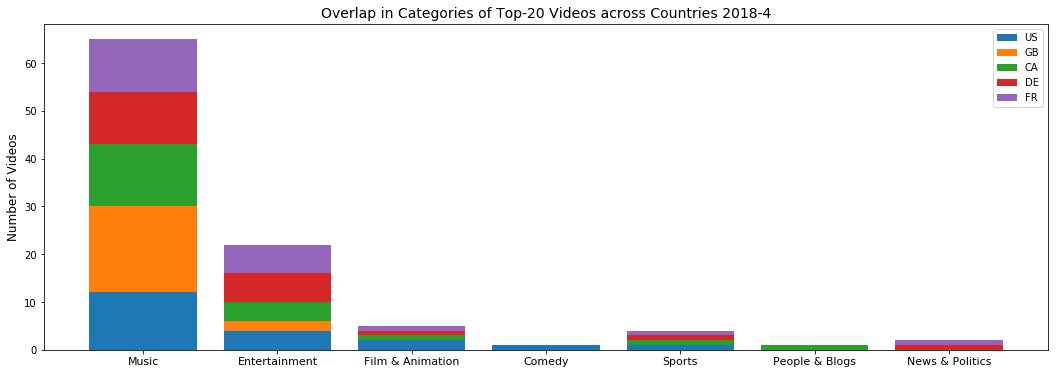

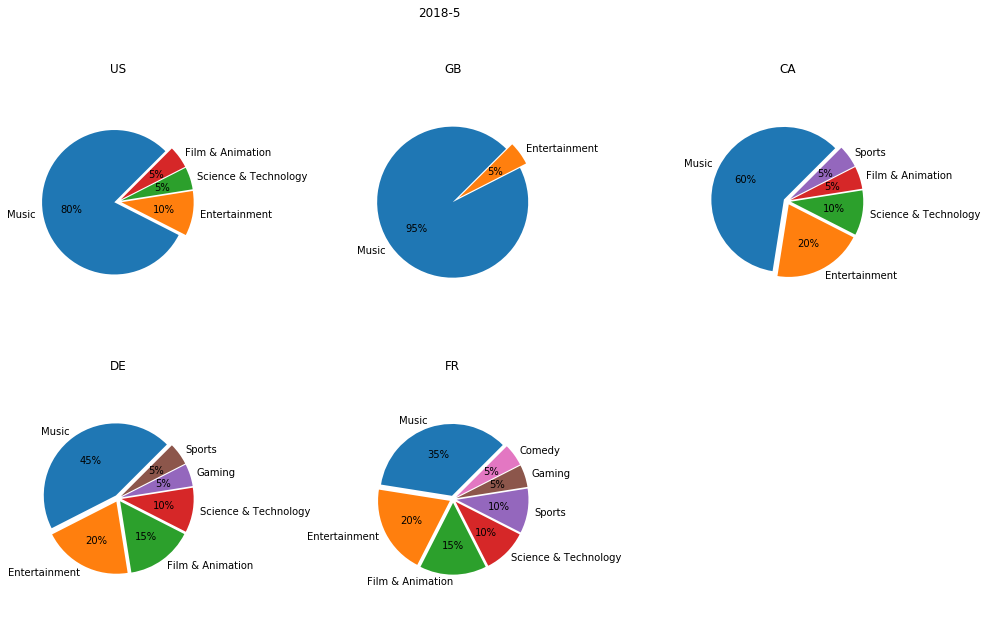

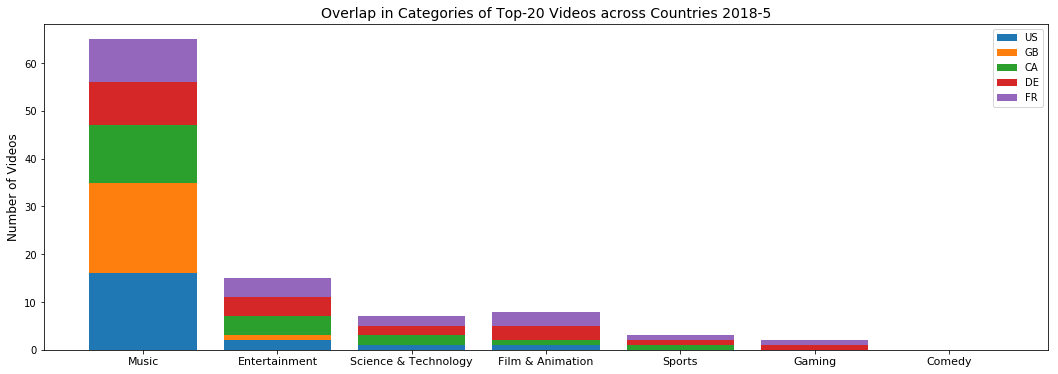

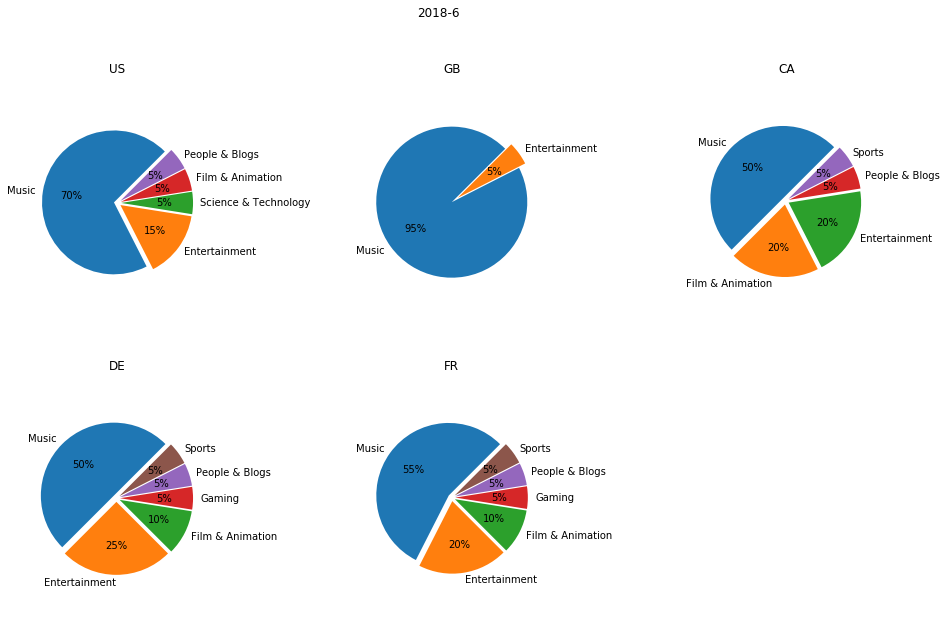

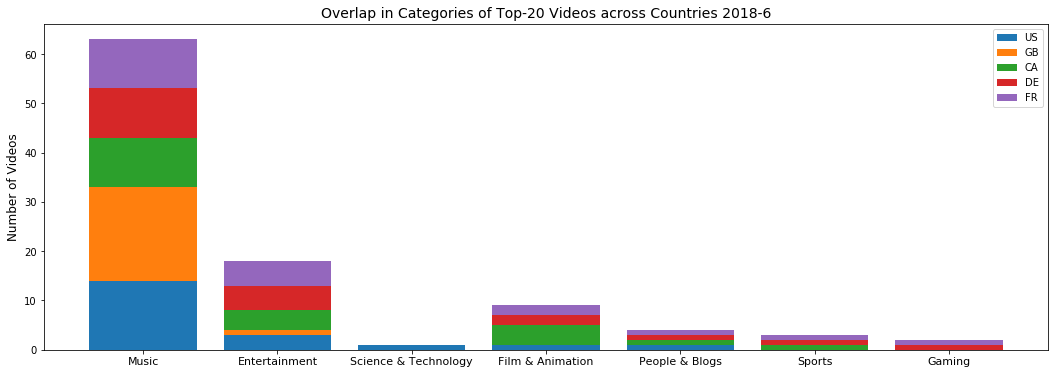

In [8]:
for month in months:
    us_cat = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    gb_cat = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    ca_cat = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    de_cat = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    fr_cat = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    
    # plot pie charts
    plt.figure(figsize=(15,10))
    plt.suptitle(f'{month}')
    plt.subplot(2,3,1)
    plt.pie(us_cat,labels = us_cat.index, explode = [.05 for x in np.arange(len(us_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('US')
    plt.subplot(2,3,2)
    plt.pie(gb_cat,labels = gb_cat.index, explode = [.05 for x in np.arange(len(gb_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('GB')
    plt.subplot(2,3,3)
    plt.pie(ca_cat,labels = ca_cat.index, explode = [.05 for x in np.arange(len(ca_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('CA')
    plt.subplot(2,3,4)
    plt.pie(de_cat,labels = de_cat.index, explode = [.05 for x in np.arange(len(de_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('DE')
    plt.subplot(2,3,5)
    plt.pie(fr_cat,labels = fr_cat.index, explode = [.05 for x in np.arange(len(fr_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('FR')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
    plt.savefig(f"Pie_{month}.png")
    
    # plot stacked bar charts
    unique_cats = us_cat.index.append(gb_cat.index).append(ca_cat.index).append(de_cat.index).append(fr_cat.index).unique()
    cats = {}
    for key in unique_cats:
        cats[key]=0
    us_dict = us_cat.to_dict()
    us_cats = cats.copy()
    for item in us_dict:
        us_cats[item]=us_cats[item]+us_dict[item]

    gb_dict = gb_cat.to_dict()
    gb_cats = cats.copy()
    for item in gb_dict:
        gb_cats[item]=gb_cats[item]+gb_dict[item] 

    ca_dict = ca_cat.to_dict()
    ca_cats = cats.copy()
    for item in ca_dict:
        ca_cats[item]=ca_cats[item]+ca_dict[item] 

    de_dict = de_cat.to_dict()
    de_cats = cats.copy()
    for item in de_dict:
        de_cats[item]=de_cats[item]+de_dict[item] 
        
    fr_dict = fr_cat.to_dict()
    fr_cats = cats.copy()
    for item in fr_dict:
        fr_cats[item]=fr_cats[item]+fr_dict[item] 
    plt.figure(figsize = (18,6))
    p1= plt.bar(us_cats.keys(),us_cats.values())
    plt.ylabel("Number of Videos", fontsize = 12)
    plt.xticks(list(us_cats.keys()),fontsize = 11)
    plt.title(f"Overlap in Categories of Top-20 Videos across Countries {month}", fontsize = 14)
    bottom_us = list(us_cats.values())
    p2 = plt.bar(gb_cats.keys(),gb_cats.values(), bottom=bottom_us)
    bottom_gb = list(gb_cats.values())
    bottom_us_gb = [sum(x) for x in zip(bottom_us,bottom_gb)]
    p3 = plt.bar(ca_cats.keys(),ca_cats.values(), bottom=bottom_us_gb)
    bottom_ca = list(ca_cats.values())
    bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb,bottom_ca)]
    p4 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
    bottom_de = list(de_cats.values())
    bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb_ca,bottom_de)]
    p5 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
    plt.legend((p1,p2,p3,p4,p5),("US",'GB','CA','DE','FR'))
    plt.savefig(f"stacked_bar_{month}.png")

# Video overlap rates across countries

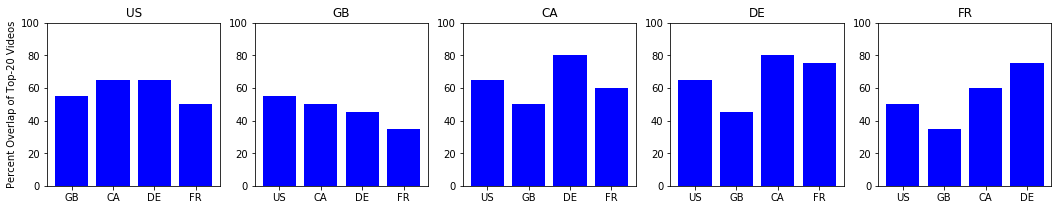

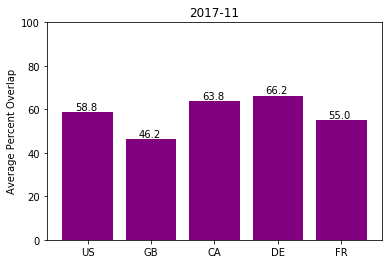

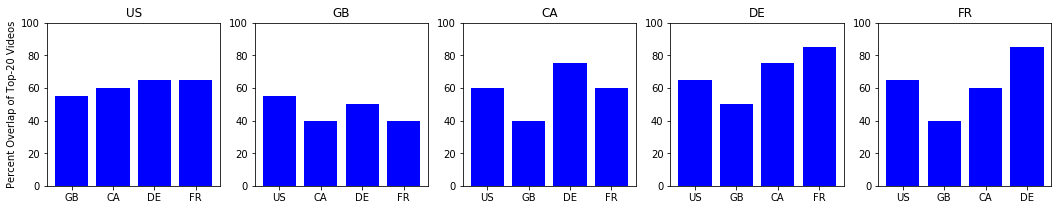

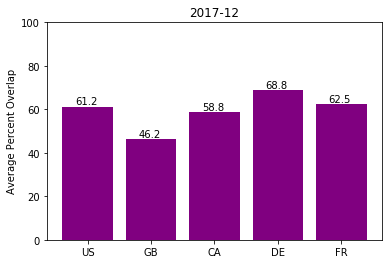

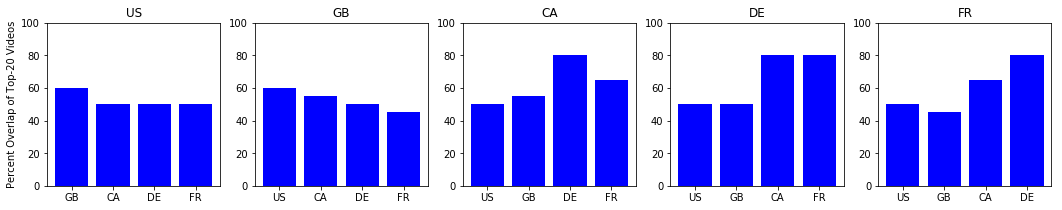

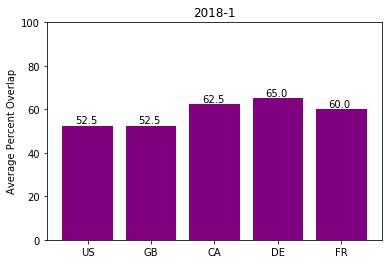

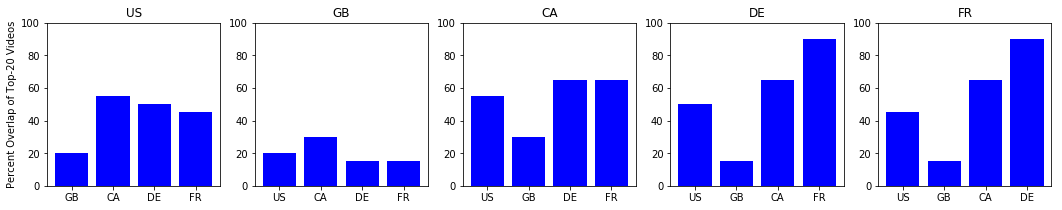

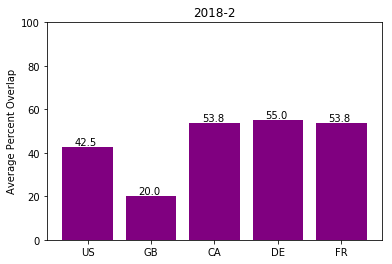

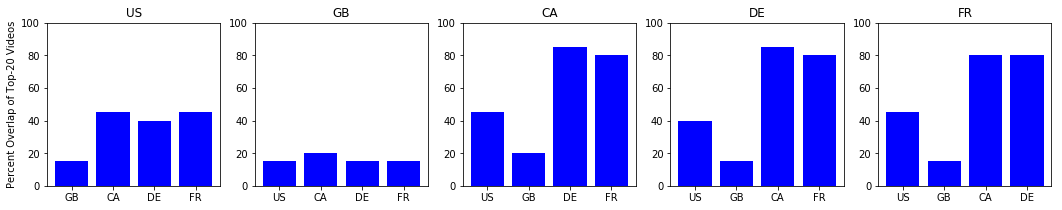

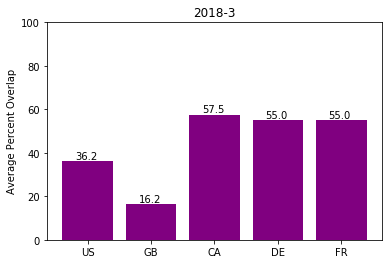

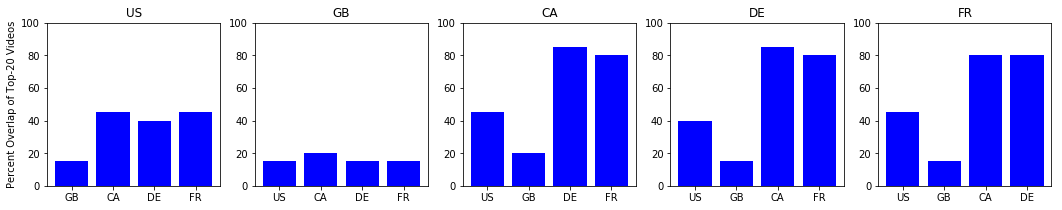

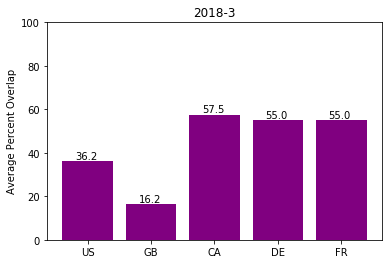

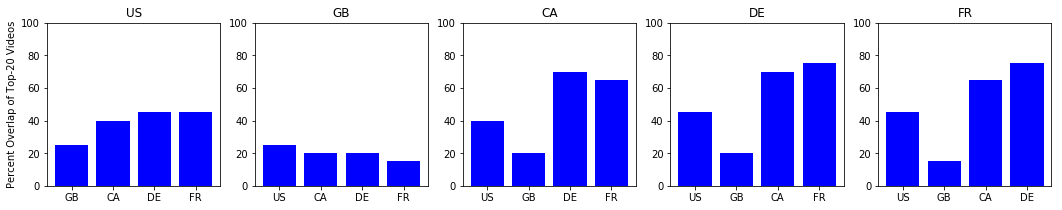

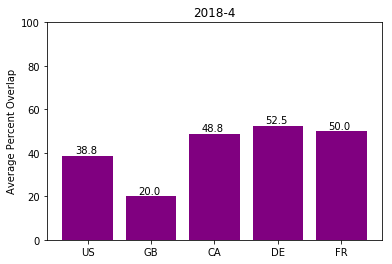

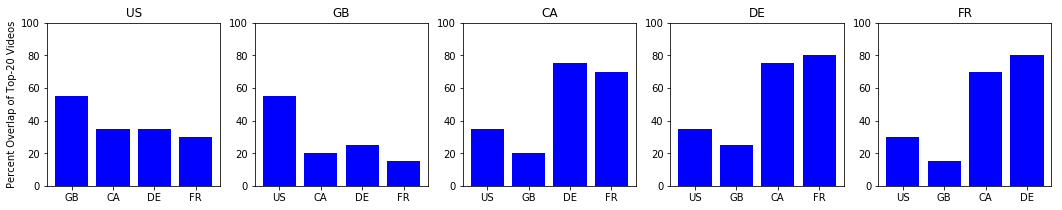

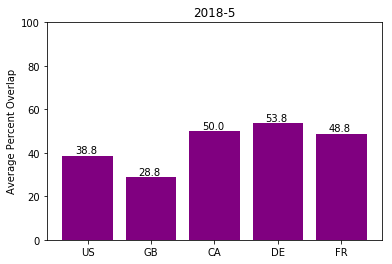

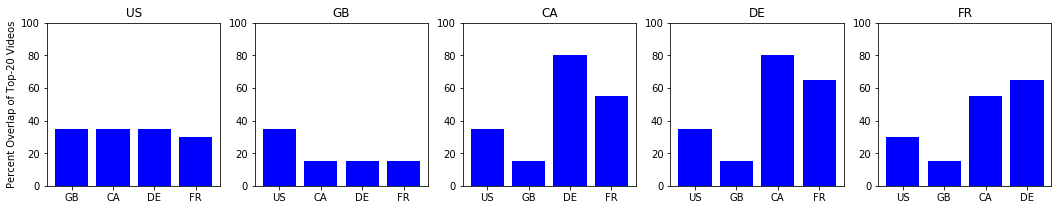

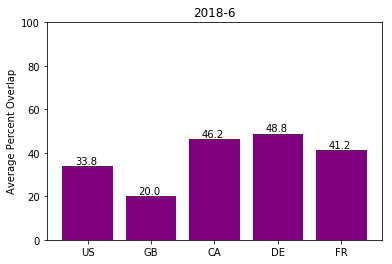

In [34]:
for month in months:
    us_title = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] == month]['title']
    gb_title = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] == month]['title']
    ca_title = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] == month]['title']
    de_title = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] == month]['title']
    fr_title = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] == month]['title']
    count = 0
    for item in gb_title:
        if item in list(us_title):
            count = count + 1
            us_gb_overlap = int(count/20*100)

    count = 0
    for item in ca_title:
        if item in list(us_title):
            count = count + 1
            us_ca_overlap = int(count/20*100)
    count = 0
    for item in de_title:
        if item in list(us_title):
            count = count + 1
            us_de_overlap = int(count/20*100)

    count = 0
    for item in fr_title:
        if item in list(us_title):
            count = count + 1
            us_fr_overlap = int(count/20*100)

    count = 0
    for item in ca_title:
        if item in list(gb_title):
            count = count + 1
            gb_ca_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(gb_title):
            count = count + 1
            gb_de_overlap = int(count/20*100)

    count = 0
    for item in fr_title:
        if item in list(gb_title):
            count = count + 1
            gb_fr_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(ca_title):
            count = count + 1
            ca_de_overlap = int(count/20*100)
    count = 0
    for item in fr_title:
        if item in list(ca_title):
            count = count + 1
            ca_fr_overlap = int(count/20*100)
    count = 0
    for item in fr_title:
        if item in list(de_title):
            count = count + 1
            de_fr_overlap = int(count/20*100)
    countries = ['US','GB','CA','DE','FR']
    us_overlaps = [us_gb_overlap,us_ca_overlap,us_de_overlap,us_fr_overlap]
    us_mean = np.mean(us_overlaps)
    gb_overlaps = [us_gb_overlap,gb_ca_overlap,gb_de_overlap,gb_fr_overlap]
    gb_mean = np.mean(gb_overlaps)
    ca_overlaps = [us_ca_overlap,gb_ca_overlap,ca_de_overlap,ca_fr_overlap]
    ca_mean = np.mean(ca_overlaps)
    de_overlaps = [us_de_overlap,gb_de_overlap,ca_de_overlap,de_fr_overlap]
    de_mean = np.mean(de_overlaps)
    fr_overlaps = [us_fr_overlap,gb_fr_overlap,ca_fr_overlap,de_fr_overlap]
    fr_mean = np.mean(fr_overlaps)
    
    plt.figure(figsize = (18,3))
    plt.subplot(1,5,1)
    plt.bar(x= ['GB','CA','DE','FR'],height=us_overlaps,color='blue')
    plt.ylim(0,100)
    plt.ylabel("Percent Overlap of Top-20 Videos")
    plt.title("US")
    plt.subplot(1,5,2)
    plt.bar(x=['US','CA','DE','FR'],height=gb_overlaps,color='blue')
    plt.title("GB")
    plt.ylim(0,100)
    plt.subplot(1,5,3)
    plt.bar(x=['US','GB','DE','FR'],height=ca_overlaps,color='blue')
    plt.title("CA")
    plt.ylim(0,100)
    plt.subplot(1,5,4)
    plt.bar(x=['US','GB','CA','FR'],height=de_overlaps,color='blue')
    plt.title("DE")
    plt.ylim(0,100)
    plt.subplot(1,5,5)
    plt.bar(x=['US','GB','CA','DE'],height=fr_overlaps,color='blue')
    plt.title("FR")
    plt.ylim(0,100)
    plt.show()
    plt.bar(countries,height=[us_mean,gb_mean,ca_mean,de_mean,fr_mean],color='purple')
    plt.ylabel("Average Percent Overlap")
    plt.title(f'{month}')
    plt.ylim(0,100)
    plt.annotate(f'{us_mean:.1f}',xy=(0-.2,us_mean +1))
    plt.annotate(f'{gb_mean:.1f}',xy=(1-.2,gb_mean +1))
    plt.annotate(f'{ca_mean:.1f}',xy=(2-.2,ca_mean +1))
    plt.annotate(f'{de_mean:.1f}',xy=(3-.2,de_mean +1))
    plt.annotate(f'{fr_mean:.1f}',xy=(4-.2,fr_mean +1))
    plt.savefig(f'Overlap_rate_{month}.png')

# Video overlap scatter plots

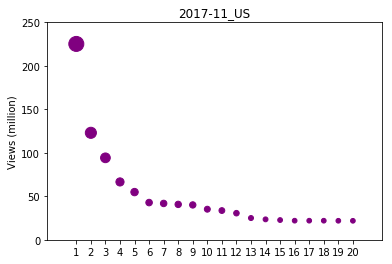

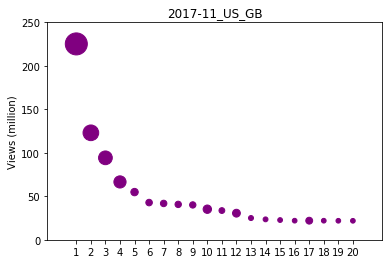

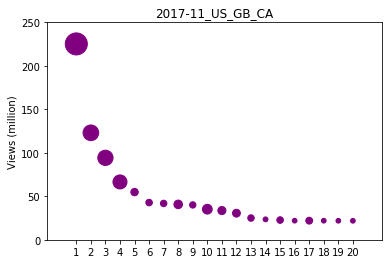

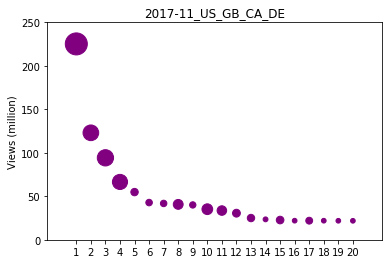

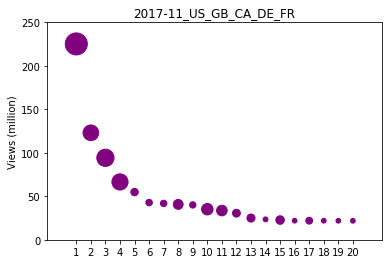

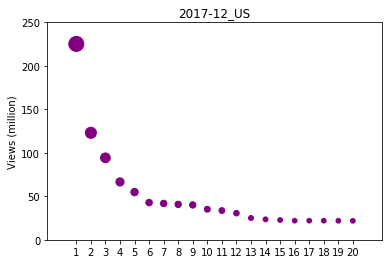

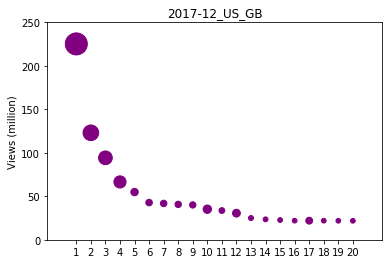

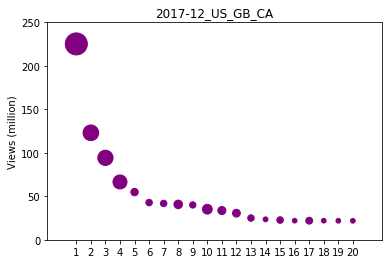

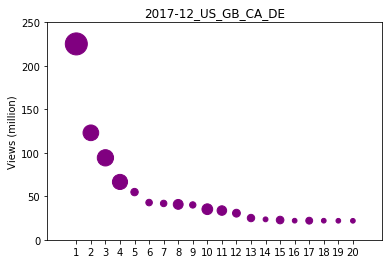

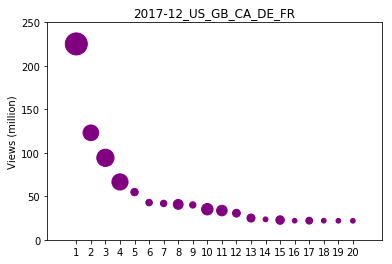

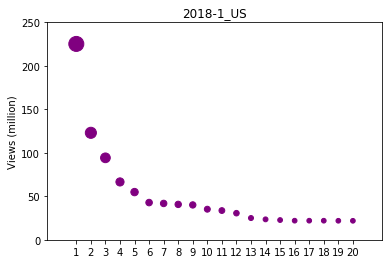

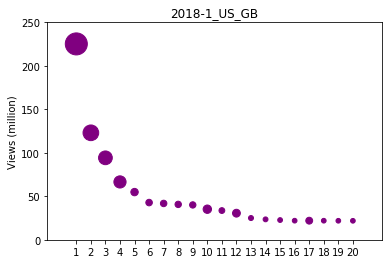

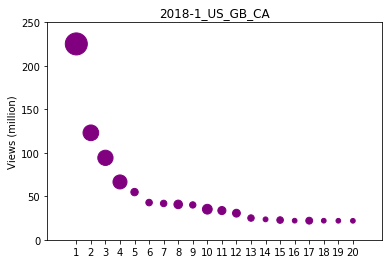

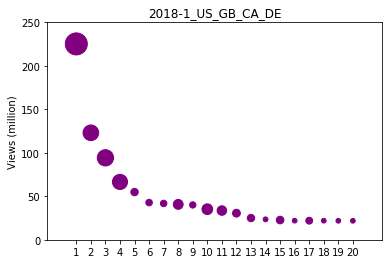

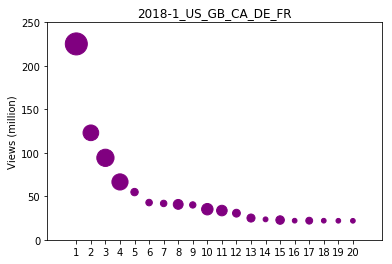

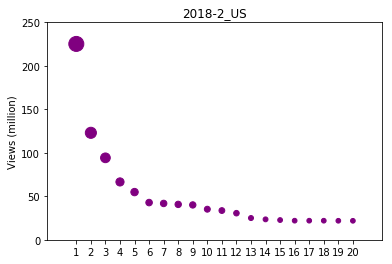

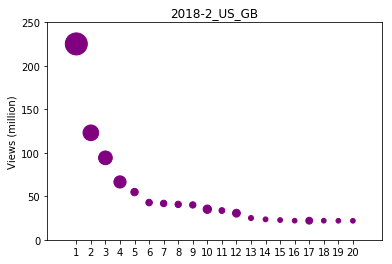

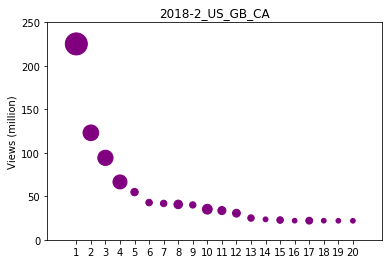

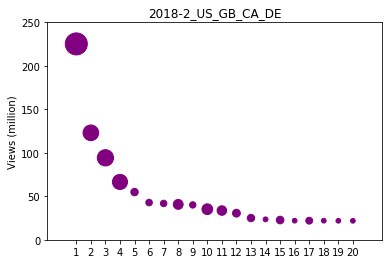

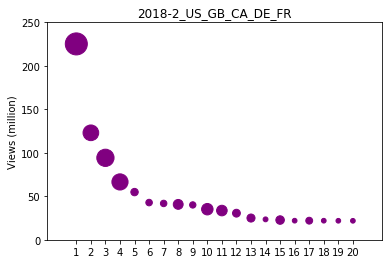

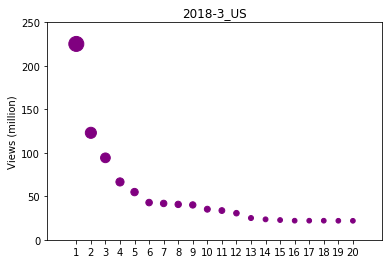

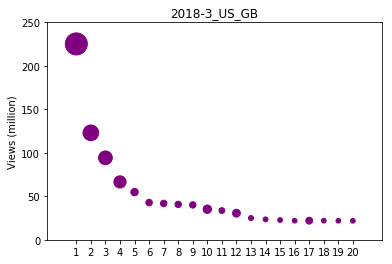

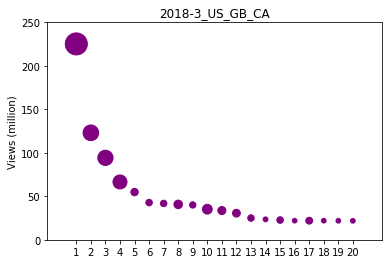

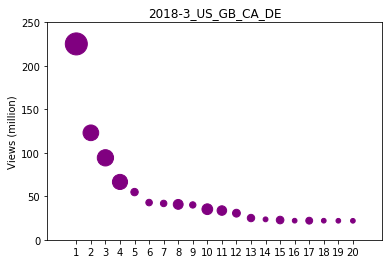

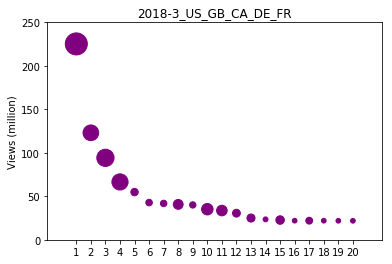

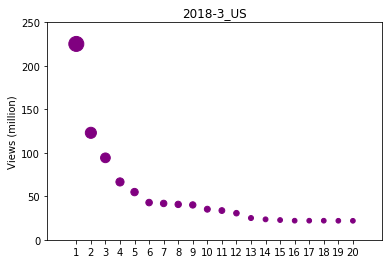

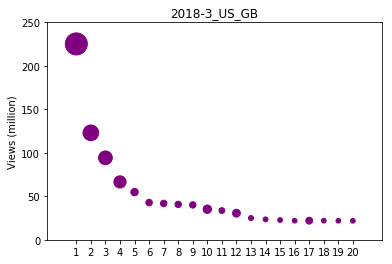

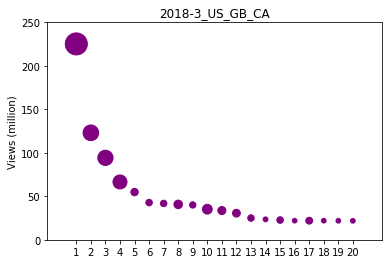

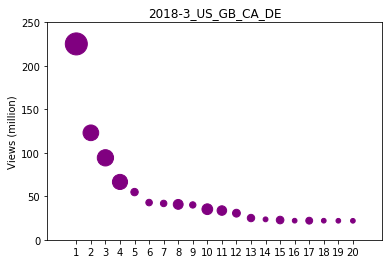

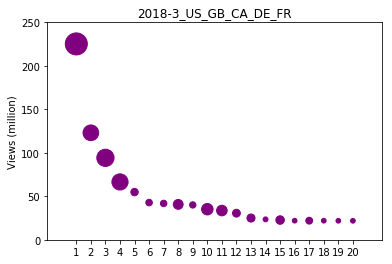

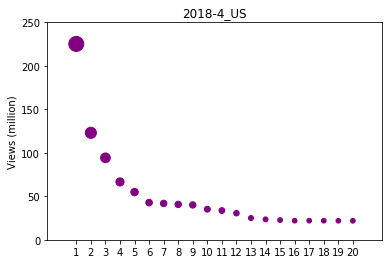

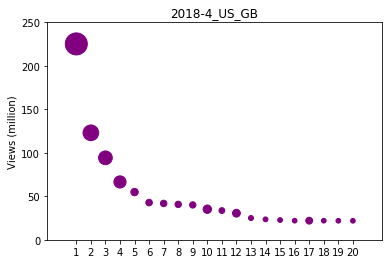

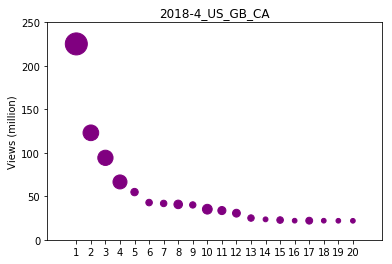

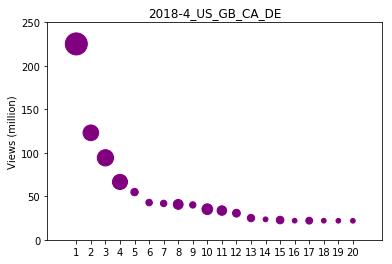

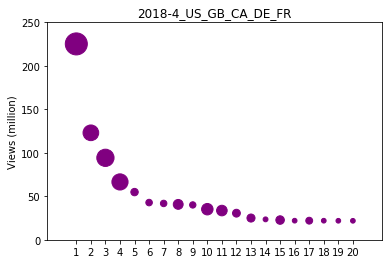

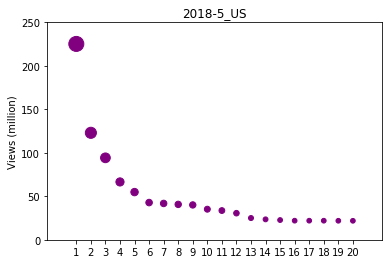

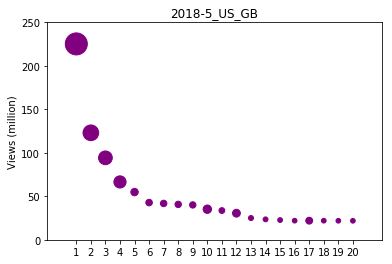

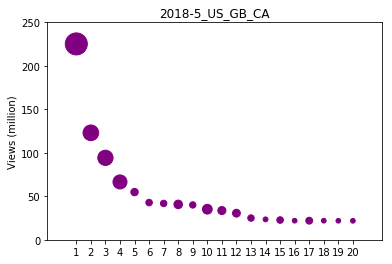

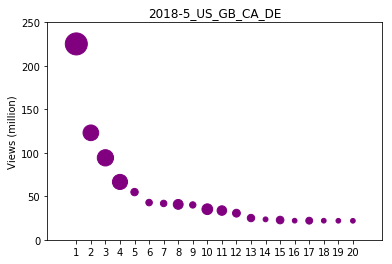

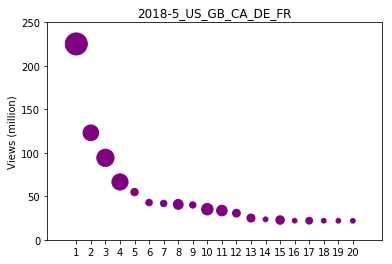

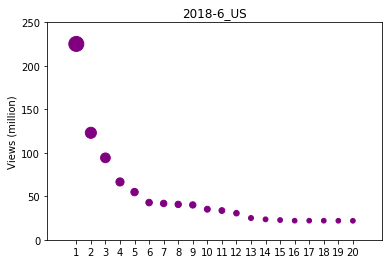

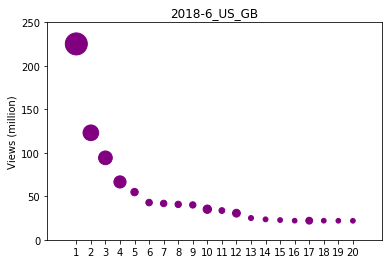

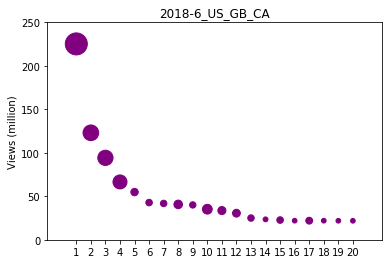

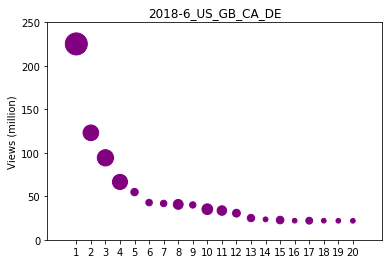

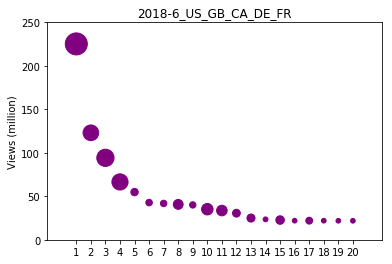

In [35]:
for month in months:
    us_dict = dict(zip(us['title'],us['views(million)']))
    gb_dict = dict(zip(gb['title'],gb['views(million)']))
    ca_dict = dict(zip(ca['title'],ca['views(million)']))
    de_dict = dict(zip(de['title'],de['views(million)']))
    fr_dict = dict(zip(fr['title'],fr['views(million)']))
    plt.scatter(np.arange(20),us_dict.values(), s = list(us_dict.values()), color = 'purple')
    plt.title(f'{month}_US')
    plt.ylim(0,250)
    plt.ylabel('Views (million)')
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_1.png')
    plt.show()
    us_gb_dict = us_dict.copy()
    for video in gb_dict.keys():
        if video in us_gb_dict.keys():
            us_gb_dict[video] = us_gb_dict[video] + gb_dict[video]
    plt.scatter(np.arange(20),us['views(million)'], s = list(us_gb_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB')
    plt.ylabel('Views (million)')
    plt.ylim(0,250)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_2.png')
    plt.show()
    us_gb_ca_dict = us_gb_dict.copy()
    for video in ca_dict.keys():
        if video in us_gb_ca_dict.keys():
            us_gb_ca_dict[video] = us_gb_ca_dict[video] + ca_dict[video]
    plt.scatter(np.arange(20),us['views(million)'], s = list(us_gb_ca_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB_CA')
    plt.ylabel('Views (million)')
    plt.ylim(0,250)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_3.png')
    plt.show()
    us_gb_ca_de_dict = us_gb_ca_dict.copy()
    for video in de_dict.keys():
        if video in us_gb_ca_de_dict.keys():
            us_gb_ca_de_dict[video] = us_gb_ca_de_dict[video] + de_dict[video]
    plt.scatter(np.arange(20),us['views(million)'], s = list(us_gb_ca_de_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE')
    plt.ylabel('Views (million)')
    plt.ylim(0,250)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_4.png')
    plt.show()
    us_gb_ca_de_fr_dict = us_gb_ca_de_dict.copy()
    for video in fr_dict.keys():
        if video in us_gb_ca_de_fr_dict.keys():
            us_gb_ca_de_fr_dict[video] = us_gb_ca_de_fr_dict[video] + fr_dict[video]
    plt.scatter(np.arange(20),us['views(million)'], s = list(us_gb_ca_de_fr_dict.values()), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE_FR')
    plt.ylabel('Views (million)')
    plt.ylim(0,250)
    plt.xlim(-2,21)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    plt.savefig(f'Scatter_{month}_5.png')
    plt.show()